In [1]:
import cf_xarray
import xarray as xr
import numpy as np

## Reading a Dataset

The `gribberish` engine can be used to read a grib2 file into a dataset.

In [2]:
ds = xr.open_dataset('MRMS_MergedReflectivityQCComposite_00.50_20220704-110040.grib2', engine='gribberish')
ds

<xarray.Dataset>
Dimensions:                        (time: 1, latitude: 3500, longitude: 7000)
Coordinates:
  * latitude                       (latitude) float64 54.99 54.98 ... 20.01 20.0
  * longitude                      (longitude) float64 230.0 230.0 ... 300.0
  * time                           (time) datetime64[ns] 2022-07-04T07:00:40
Data variables:
    mergedreflectivityqccomposite  (time, latitude, longitude) float64 ...
Attributes:
    meta:     created with gribberish

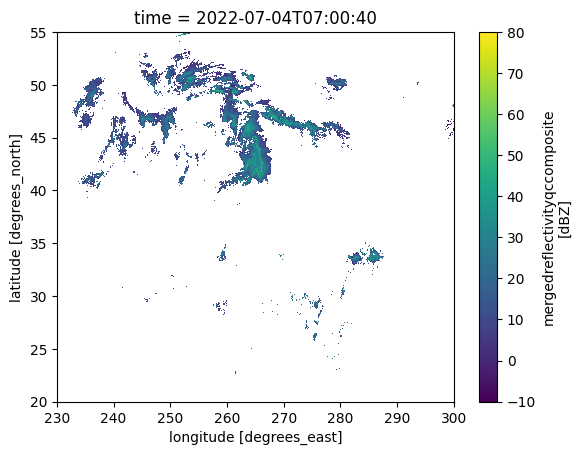

In [3]:
radar = ds['mergedreflectivityqccomposite']
radar = radar.where(radar > -10)
radar.plot(vmin=-10, vmax=80)